# HKL Model with Constant Interaction

## $d=1$

### Imports

In [2]:
from HKLnumerics import HKLconstant_1D, PlotFunctions
import numpy as np

### Single Plot

In [ ]:
U_1d_single = 8
f0_1d_single = 10

mu_1d_single = HKLconstant_1D.create_mu_array(500, U_1d_single, f0_1d_single)

rho_1d_single = HKLconstant_1D.create_rho_array(mu_1d_single, U_1d_single, f0_1d_single)


Progress: 99.8%                    

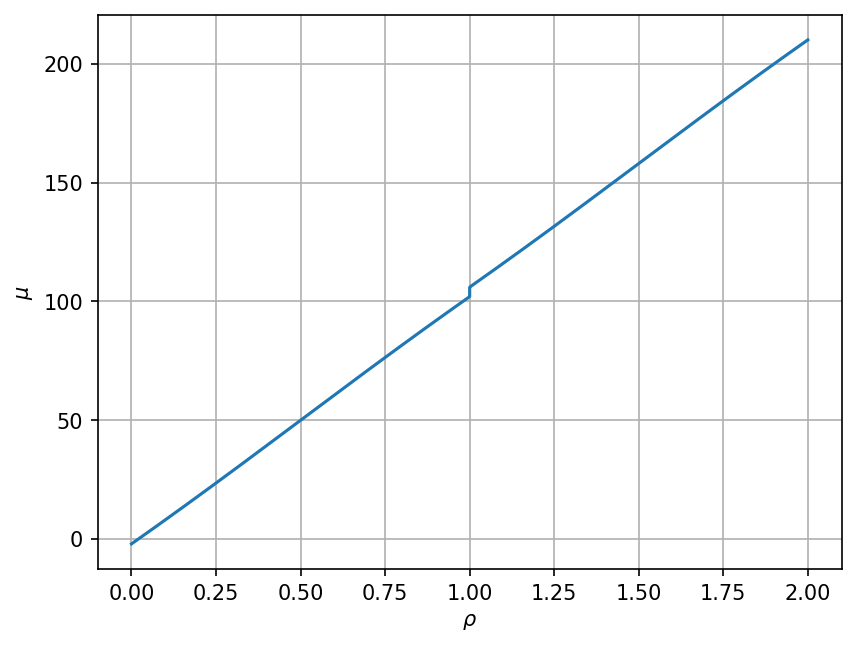

In [16]:
PlotFunctions.one_plot(rho_1d_single, mu_1d_single, r'$\rho$', r'$\mu$')

### $U=const.$, see how $f_0$ affects plot

In [37]:
U_1d_f0s = 8
f0s_1d = [0, 2, 4]
N = 500


str_f_0 = r'$f_0$'
f0_1d_labels = []
rhos_1d_f0s = []
mus_1d_f0s_list = []

for f0_val in f0s_1d:
    mu_arr = HKLconstant_1D.create_mu_array(N, U_1d_f0s, f0_val)
    rho_arr = HKLconstant_1D.create_rho_array(mu_arr, U_1d_f0s, f0_val)

    f0_1d_labels.append(f'{str_f_0} = {f0_val}')
    mus_1d_f0s_list.append(mu_arr)
    rhos_1d_f0s.append(rho_arr)

Progress: 99.8%                    

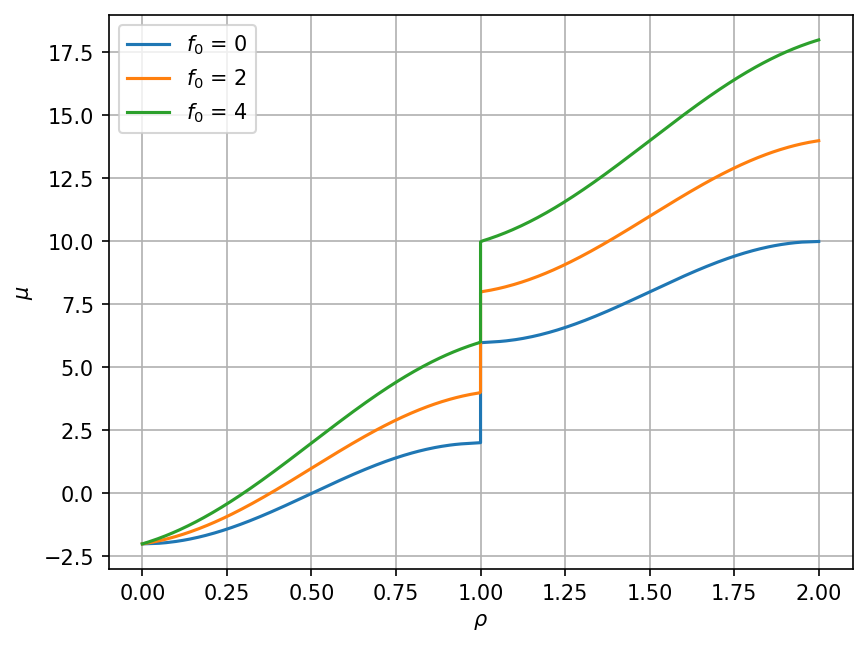

In [38]:
PlotFunctions.many_plots(f0_1d_labels, rhos_1d_f0s, mus_1d_f0s_list, r'$\rho$', r'$\mu$')

### $f_1 = const.$, see affect of different $U$

In [43]:
f_0 = 0
N = 500

U_vals = [1, 2, 3, 4]

f_0_str = r'$f_0$'
rhos_U = []
mus_U = []
labels_U = []

for U_val in U_vals:
    mu_U_val = HKLconstant_1D.create_mu_array(N, U_val, f_0)
    rho_U_val =HKLconstant_1D.create_rho_array(mu_U_val, U_val, f_0)

    labels_U.append(f'U = {U_val}')
    rhos_U.append(rho_U_val)
    mus_U.append(mu_U_val)

Progress: 99.8%                    

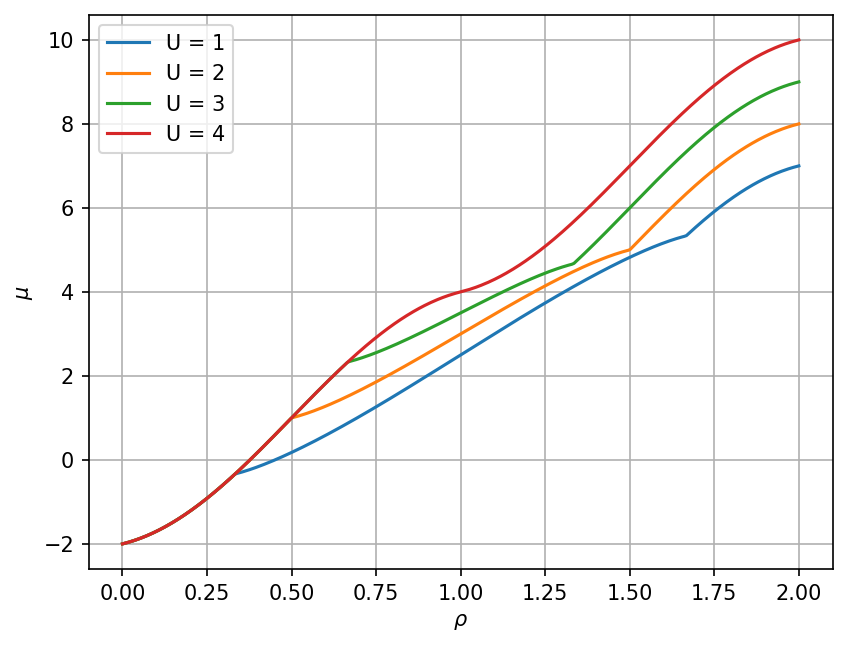

In [42]:
PlotFunctions.many_plots(labels_U, rhos_U, mus_U, r'$\rho$', r'$\mu$')

### Energy Density

#### Single Plot

Progress: 99.8%                    

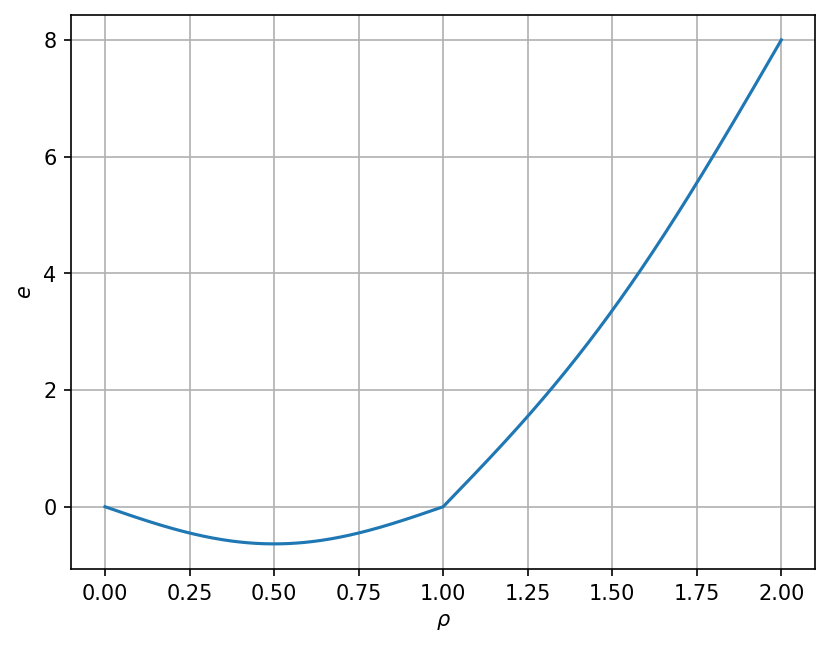

In [15]:
e_1d_single = HKLconstant_1D.create_energy_array(mu_1d_single, rho_1d_single, U_1d_single, f0_1d_single)

PlotFunctions.one_plot(rho_1d_single, e_1d_single, r'$\rho$', r'$e$')

## $d=2$

## $d=3$